# 파마 인디언 당뇨병 예측 

In [16]:
#당뇨병 여부를 판단하는 머신러닝 예측 모델 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score 
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler

In [20]:
from sklearn.linear_model import LogisticRegression

diabetes_data=pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

#결과값을 보면 0에 조금 더 치중되어 있는 양상을 보임 

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [24]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
#피처 데이터 세트 X, 레이블 데이터 세트 y추출 
#맨 끝이 outcome 칼럼으로 레이블 값임 칼럼의 위치를 -1을 이용해 추출

X=diabetes_data.iloc[:,:-1]
y=diabetes_data.iloc[:,-1]

X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.2, random_state=156, stratify=y)

#로지스틱 회귀로 학습, 예측, 평가 수행

Ir_clf=LogisticRegression()
Ir_clf.fit(X_train, y_train)
pred=Ir_clf.predict(X_test)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
from sklearn.linear_model import LogisticRegression

get_clf_eval(y_test, pred)

* 이 결과 값으로 오차행렬과, 정확도, 정밀도, 재현율, F1, AUC값이 출력 됨

In [ ]:
pred_proba_c1=Ir_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

* 이 결과 값으로 정밀도와 재현율의 그래프가 나오고 그 적정값이 0.42 정도임을 알 수 있음 

#하지만 그 두 지표는 모두 0.7이 안되기 때문에 조정이 필요해 보임 

In [46]:
diabetes_data.describe()
#min값이 0인 경우가 많음 그래서 이 부분을 대체 해 주어야 함 

,Pregnancies,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000
mean,3.845052,0.471876,33.240885,0.348958
std,3.369578,0.331329,11.760232,0.476951
min,0.000000,0.078000,21.000000,0.000000
25%,1.000000,0.243750,24.000000,0.000000
50%,3.000000,0.372500,29.000000,0.000000
75%,6.000000,0.626250,41.000000,1.000000
max,17.000000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

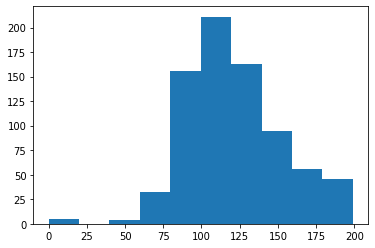

In [29]:
plt.hist(diabetes_data['Glucose'],bins=10)
#한개의 칼럼을 가져와서 히스토그램을 가져와서 봐도 0인 확률이 있음

In [31]:
#0값을 검사할 피처 명 리스트
zero_features=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

#전체데이터건수
total_count=diabetes_data['Glucose'].count()

for feature in zero_features:
    zero_count=diabetes_data[diabetes_data[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


In [39]:
#zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체 
mean_zero_features=diabetes_data[zero_features].mean
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0, mean_zero_features)

In [ ]:
X=diabetes_data.iloc[:,:-1]
y=diabetes_data.iloc[:,-1]

#StandardScaler 클래스를 이용해서 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.2, random_state=156, stratify=y)


Ir_clf=LogisticRegression()
Ir_clf.fit(X_train, y_train)
pred=Ir_clf.predict(X_test)
get_clf_eval(y_test, pred)

* 이 결과값으로 새로운 오차 행렬 그리고 평가값이 나옴 

In [41]:
#재현율 값의 변화가 필요해 보이기 때문에, 임계값을 통한 변화를 줘볼 것 

thresholds=[0.3, 0.33, 0.36, 0.39, 0.45, 0.48, 0.50]
pred_proba=Ir_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

* 이 결과값으로 어떤 임계값에서 가장 optimal한 결과가 나오는지 알 수 있음= threshold가 0.48일 경우 



In [ ]:
#임곗값을 0.48로 설정한 Binarizer 생성
binarizer=Binarizer(threshold=0.48)

#위에서 구한 Ir_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 칼럼 값을 Binarizer 변환 
pred_th_048=binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

get_clf_eval(y_test, pred_th_048)

* 이 결과값으로 새로정한 임계값에서의 오차행렬과 평가 값들이 출력 됨